# Water Qulity Prediction Using Decision Tree Algorithm

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/water_potability.csv");
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Visualization

Show total number of data rows and columns

In [11]:
print("Number of Rows in the dataset:", dataset.shape[0])
print("Number of Columns in the dataset:", dataset.shape[1])

Number of Rows in the dataset: 3276
Number of Columns in the dataset: 10


Get overall dataset distrubution

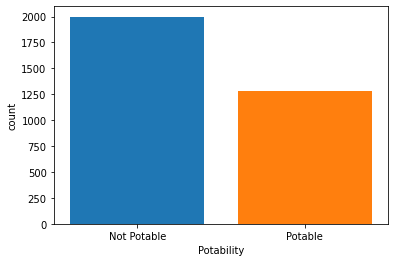

In [12]:
ax = sns.countplot(x = "Potability",data= dataset, saturation=1)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

Get water quality according to PH level

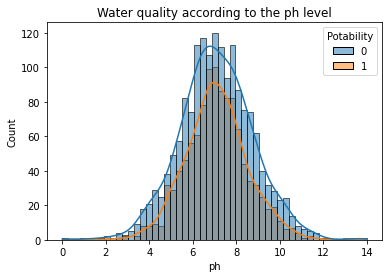

In [13]:
sns.histplot(x='ph', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the ph level")  
plt.show()

Get water quality according to Hardness

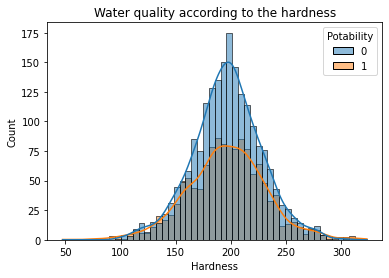

In [14]:
sns.histplot(x='Hardness', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the hardness")  
plt.show()

Get water quality according to Solids

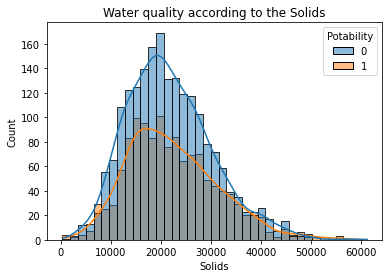

In [15]:
sns.histplot(x='Solids', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the Solids")  
plt.show()

Get water quality according to Chloramines

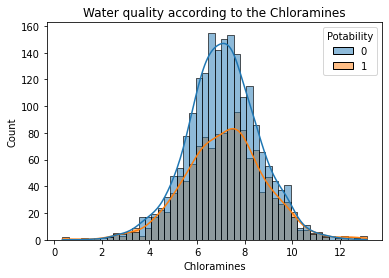

In [16]:
sns.histplot(x='Chloramines', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the Chloramines")  
plt.show()

Get water quality according to Sulfates

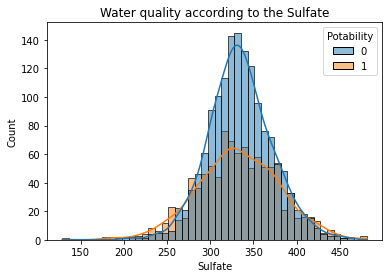

In [17]:
sns.histplot(x='Sulfate', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the Sulfate")  
plt.show()

Get water quality according to Conductivity

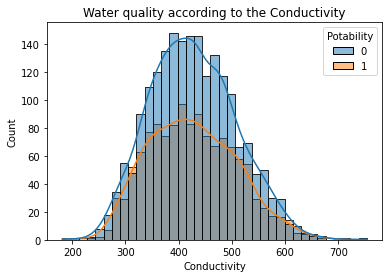

In [18]:
sns.histplot(x='Conductivity', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the Conductivity")  
plt.show()

Get water quality according to Organic_carbon

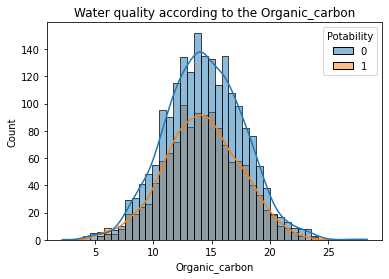

In [19]:
sns.histplot(x='Organic_carbon', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the Organic_carbon")  
plt.show()

Get water quality according  Trihalomethanes

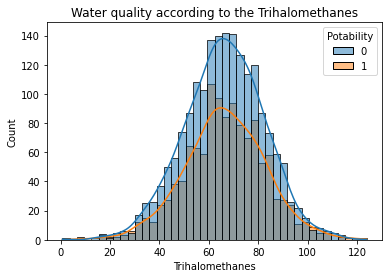

In [20]:
sns.histplot(x='Trihalomethanes', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the Trihalomethanes")  
plt.show()

Get water quality according to Turbidity

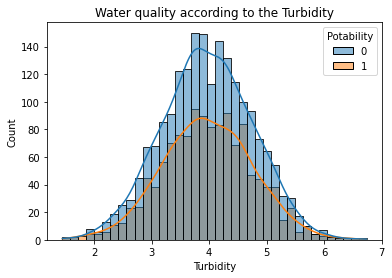

In [21]:
sns.histplot(x='Turbidity', data=dataset, kde=True, hue='Potability')
plt.title("Water quality according to the Turbidity")  
plt.show()

# Data pre-processing

### Check precentage of null values

In [22]:
print(round(dataset.isnull().sum() * 100/dataset.shape[0]))

ph                 15.0
Hardness            0.0
Solids              0.0
Chloramines         0.0
Sulfate            24.0
Conductivity        0.0
Organic_carbon      0.0
Trihalomethanes     5.0
Turbidity           0.0
Potability          0.0
dtype: float64


### Set mean value of each column to null values

In [23]:
dataset['ph'] = dataset['ph'].fillna(dataset['ph'].mean())
dataset['Sulfate'] = dataset['Sulfate'].fillna(dataset['Sulfate'].mean())
dataset['Trihalomethanes'] = dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mean())

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [25]:
print(round(dataset.isnull().sum() * 100/dataset.shape[0]))

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64


In [26]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Check outliers

### pH

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


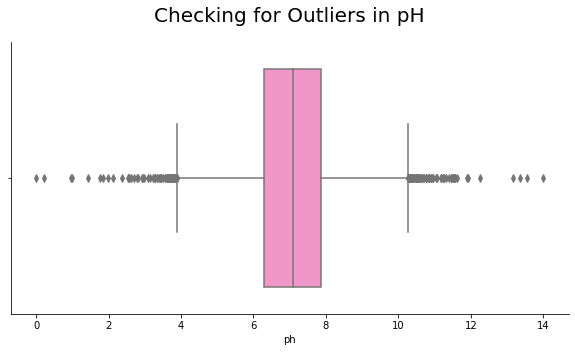

In [27]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["ph"], color="#FF87CA")
plt.title("Checking for Outliers in pH", size=20, pad=20)
sns.despine()
plt.show()

### Hardness

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


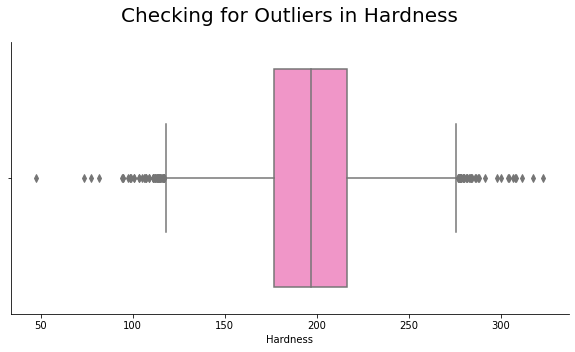

In [28]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Hardness"], color="#FF87CA")
plt.title("Checking for Outliers in Hardness", size=20, pad=20)
sns.despine()
plt.show()

### Solids

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


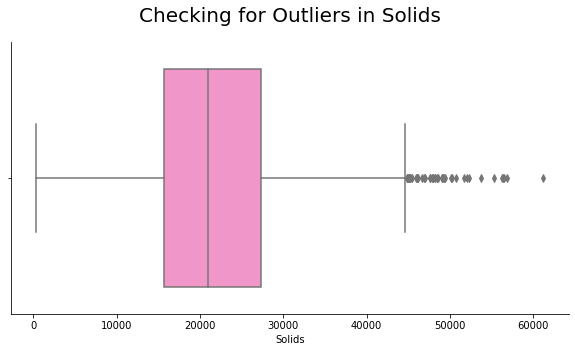

In [29]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Solids"], color="#FF87CA")
plt.title("Checking for Outliers in Solids", size=20, pad=20)
sns.despine()
plt.show()

### Chloramines

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


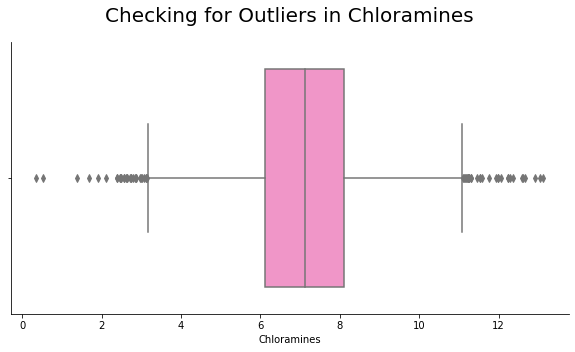

In [30]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Chloramines"], color="#FF87CA")
plt.title("Checking for Outliers in Chloramines", size=20, pad=20)
sns.despine()
plt.show()

### Sulfate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


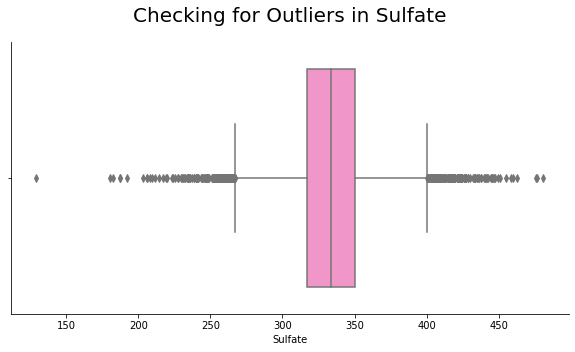

In [31]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Sulfate"], color="#FF87CA")
plt.title("Checking for Outliers in Sulfate", size=20, pad=20)
sns.despine()
plt.show()

### Conductivity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


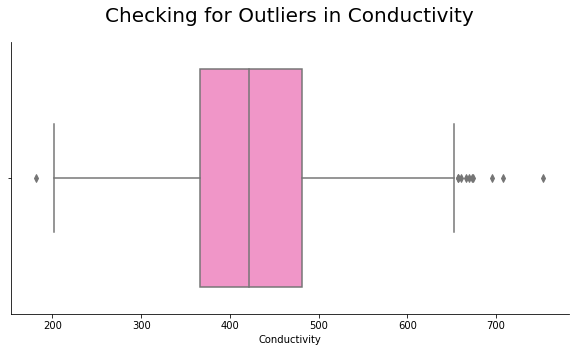

In [32]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Conductivity"], color="#FF87CA")
plt.title("Checking for Outliers in Conductivity", size=20, pad=20)
sns.despine()
plt.show()

### Organic_carbon

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


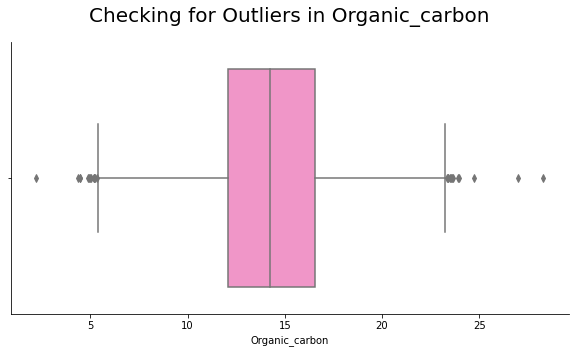

In [33]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Organic_carbon"], color="#FF87CA")
plt.title("Checking for Outliers in Organic_carbon", size=20, pad=20)
sns.despine()
plt.show()

### Trihalomethanes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


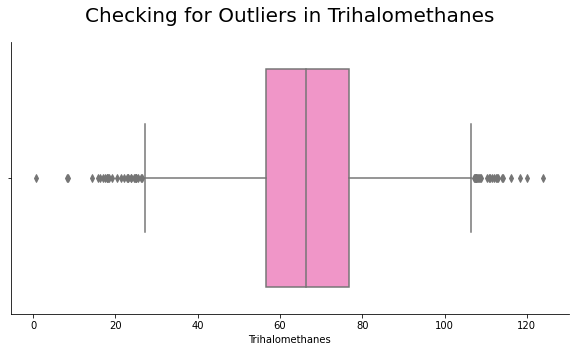

In [34]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Trihalomethanes"], color="#FF87CA")
plt.title("Checking for Outliers in Trihalomethanes", size=20, pad=20)
sns.despine()
plt.show()

### Turbidity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


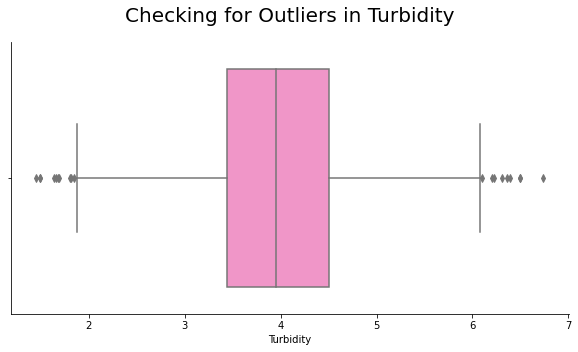

In [35]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Turbidity"], color="#FF87CA")
plt.title("Checking for Outliers in Turbidity", size=20, pad=20)
sns.despine()
plt.show()

### Potability

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


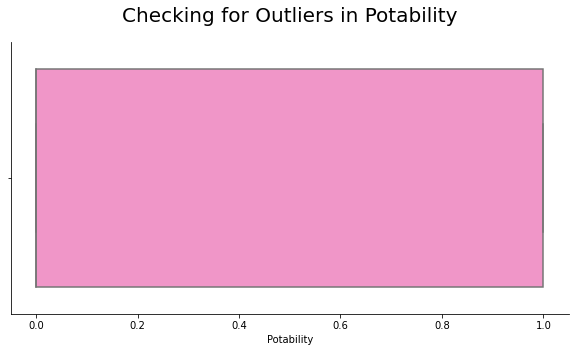

In [36]:
plt.figure(figsize=[10,5])
sns.boxplot(dataset["Potability"], color="#FF87CA")
plt.title("Checking for Outliers in Potability", size=20, pad=20)
sns.despine()
plt.show()

# Model

Find correlation

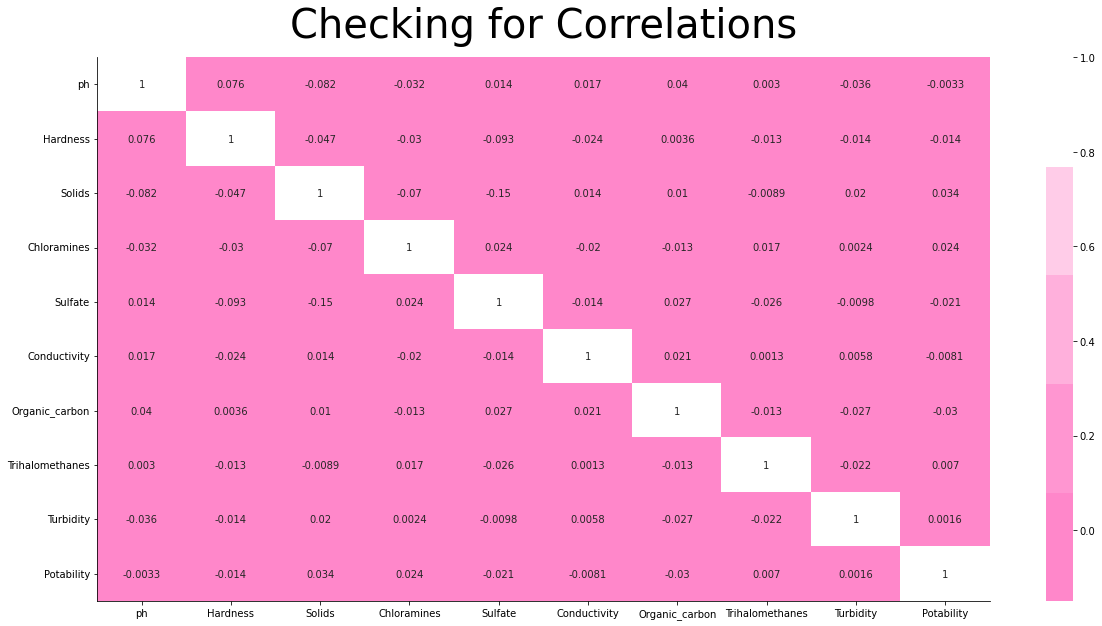

In [37]:
plt.figure(figsize=[20,10])
heat = dataset.corr()
sns.heatmap(heat, cmap=['#FF87CA','#ff96d1','#ffb0dc','#ffcce8','white'], annot=True)
plt.title("Checking for Correlations", size=40, pad=20)
sns.despine()
plt.show()

Divide dataset

In [38]:
x = dataset.drop(['Potability'], axis = 1)
y = dataset['Potability']

In [39]:
scaler = StandardScaler()

x= scaler.fit_transform(x)
x

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

Split data set

In [40]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 42)

Use "SMOTE" to balance dataset

In [41]:
smote = SMOTE()

X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

In [42]:
X_train_balanced.shape, Y_train_balanced.shape

((2762, 9), (2762,))

Train the model

In [53]:
model = DecisionTreeClassifier(max_depth = 3)

model.fit(X_train_balanced, Y_train_balanced)

DecisionTreeClassifier(max_depth=3)

Get Tree view

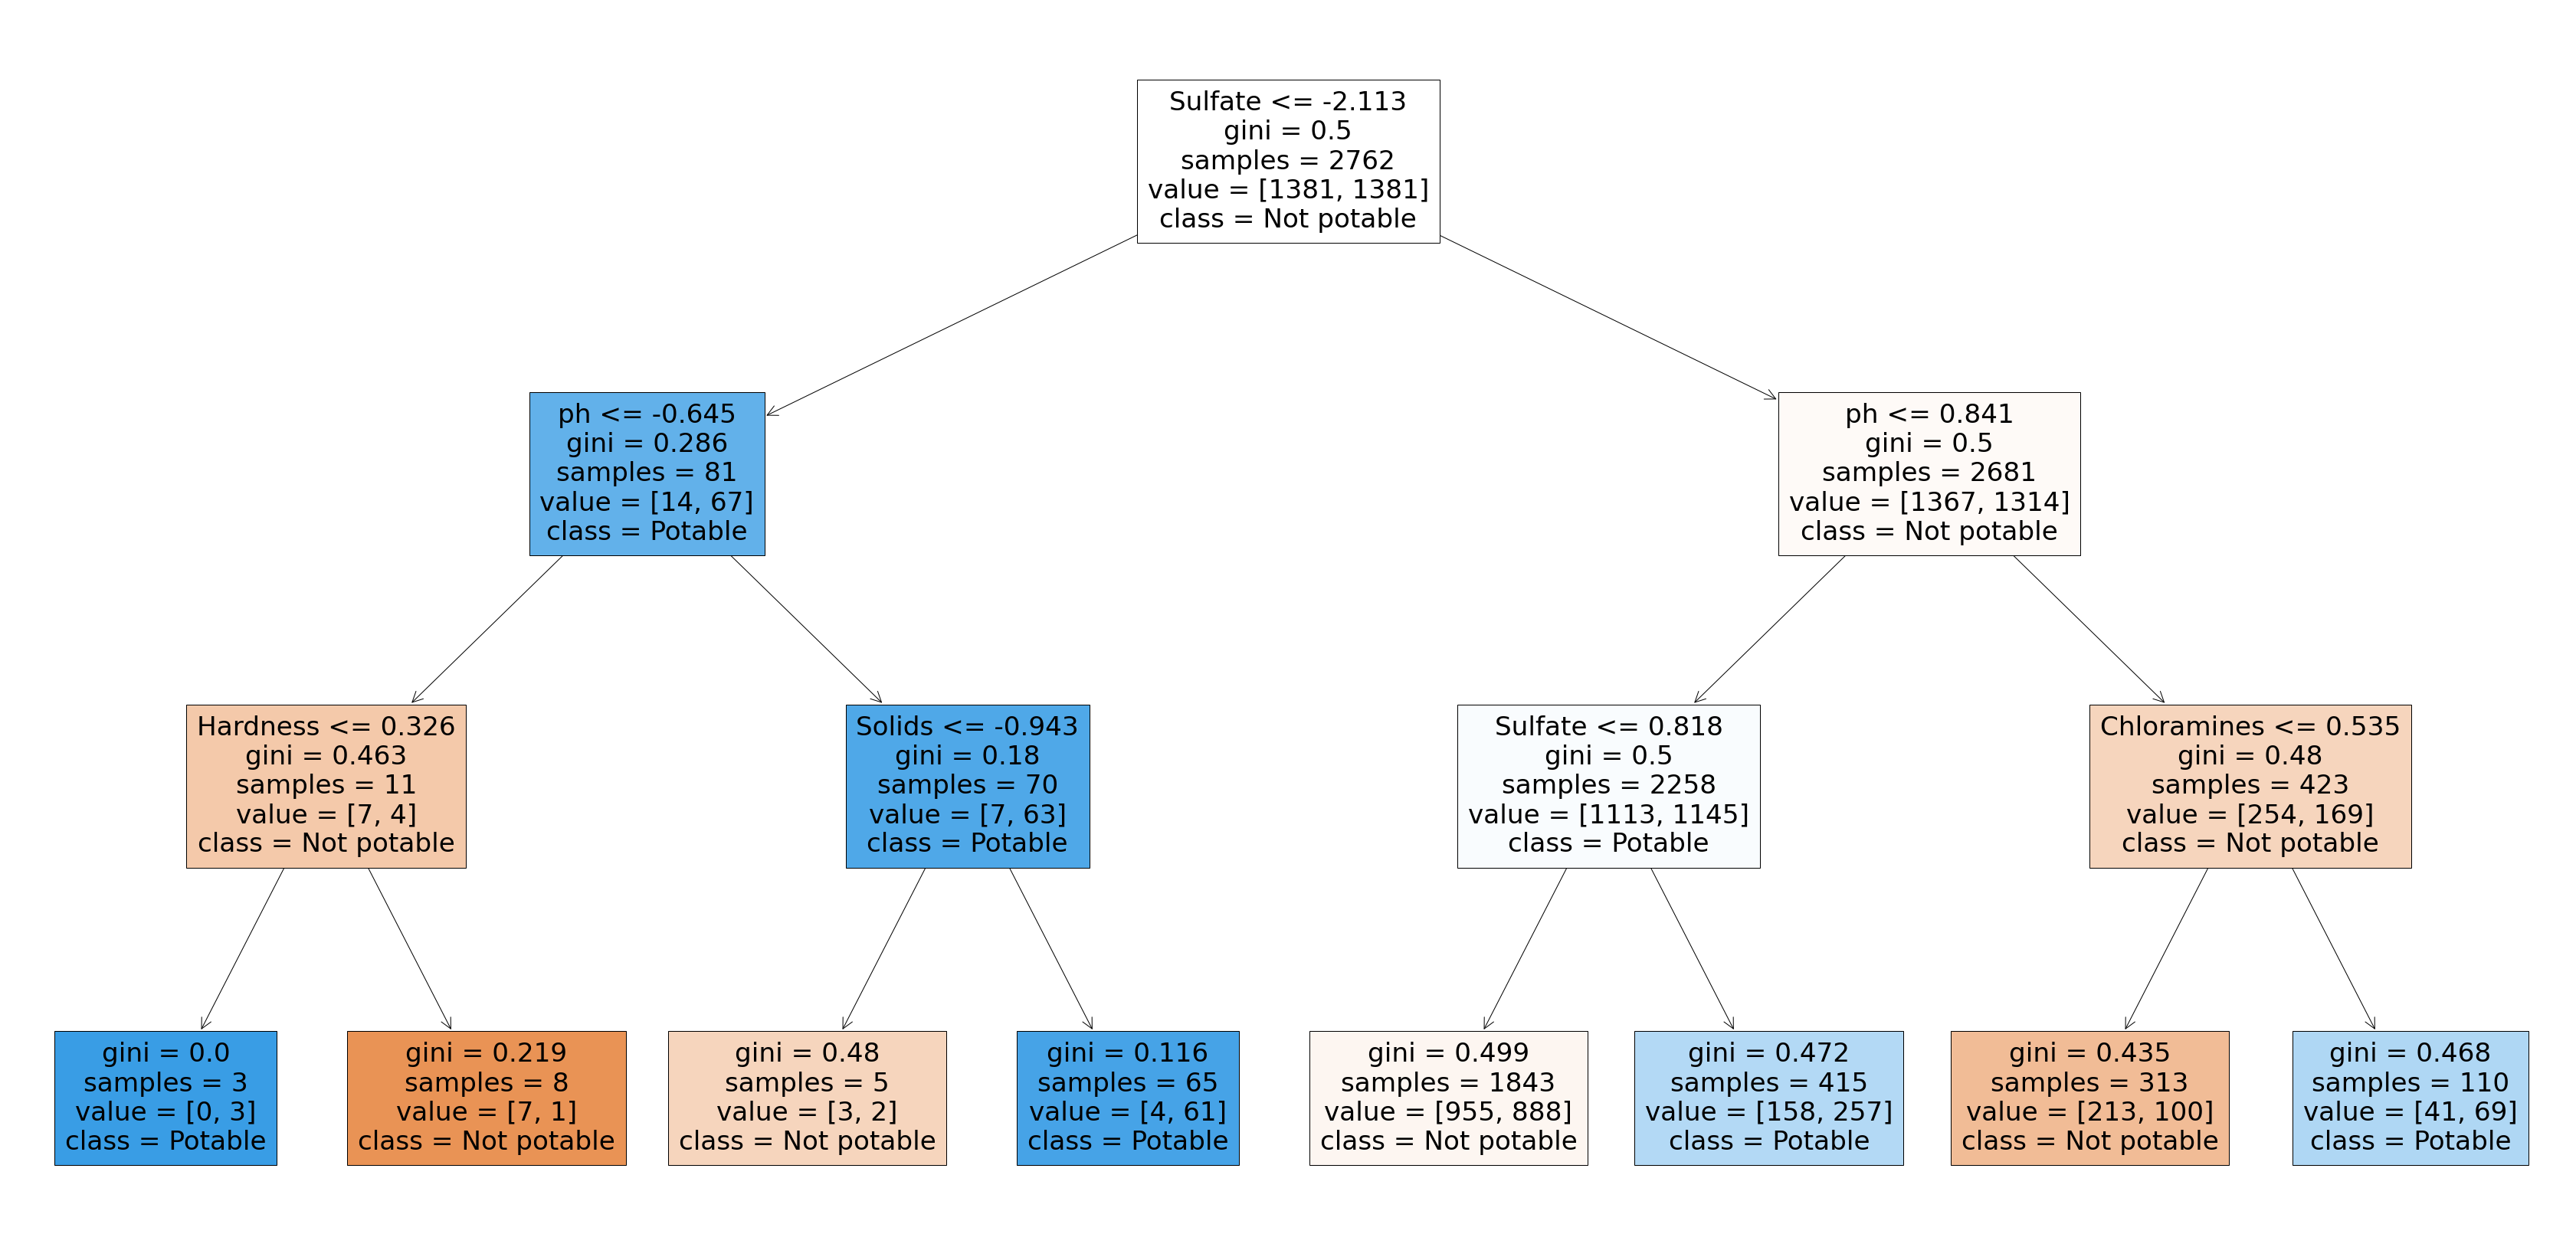

In [54]:
plt.figure(figsize=(60,30))
plot_tree(model, feature_names = dataset.drop(['Potability'], axis = 1).columns, class_names=['Not potable', 'Potable'], filled=True);

In [55]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

Get Confusion Matrix

In [56]:
print(confusion_matrix(y_train, y_train_pred))

print(confusion_matrix(y_val, y_val_pred))

[[1178  203]
 [ 650  262]]
[[527  90]
 [258 108]]


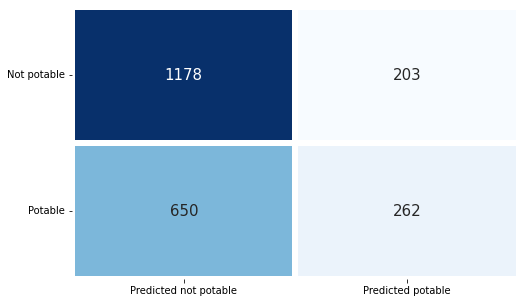

In [59]:
dtc_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(dtc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not potable', 'Potable'], xticklabels = ['Predicted not potable', 'Predicted potable'])
plt.yticks(rotation = 0)
plt.show()

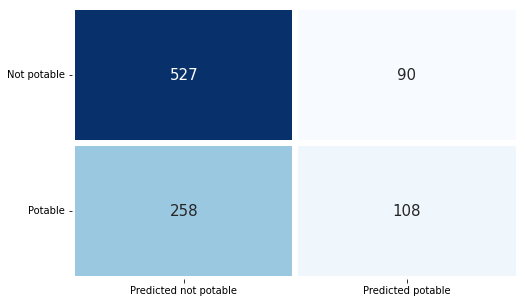

In [57]:
dtc_cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(dtc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not potable', 'Potable'], xticklabels = ['Predicted not potable', 'Predicted potable'])
plt.yticks(rotation = 0)
plt.show()

### Get accuracy values

Accuracy of training and test dataset

In [58]:
print("Accuracy of training set: " + str(accuracy_score(y_train, y_train_pred)))

print("Accuracy of test set: " + str(accuracy_score(y_val, y_val_pred)))

Accuracy of training set: 0.6279982555604012
Accuracy of test set: 0.6459816887080366


Precision of training and test dataset

In [51]:
print("Precision of training set: " + str(precision_score(y_train, y_train_pred)))

print("Precision of test set: " + str(precision_score(y_val, y_val_pred)))

Precision of training set: 0.5634408602150538
Precision of test set: 0.5454545454545454


Recall value of training and test dataset

In [52]:
print("Recall of training set: " + str(recall_score(y_train, y_train_pred)))

print("Recall of test set: " + str(recall_score(y_val, y_val_pred)))

Recall of training set: 0.28728070175438597
Recall of test set: 0.29508196721311475
